In [ ]:
"""
Classification Artificial Neural Network
Classification ANNs seek to classify an observation as belonging to 
some discrete class as a function of the inputs. The input features 
(independent variables) can be categorical or numeric types, however, 
we require a categorical feature as the dependent variable.
"""

"""
Regression Artificial Neural Network
Regression ANNs predict an output variable as a function of the inputs.
The input features (independent variables) can be categorical or numeric
types, however, for regression ANNs, we require a numeric dependent
variable. If the output variable is a categorical variable (or binary)
the ANN will function as a classifier 
"""


In [22]:
"""
Exercise 1 – The Simpsons Revisited
We want to be able to predict the sex of a Simpson using a neural network (cf. chapter on
Decision trees from Data & A.I. 1.2). Note: this dataset is very small and therefore we
cannot construct a validation set or test set. ...
a.  Read in the Simpsons' dataset from the file ‘The Simpsons original.csv’
b.  What kind of prediction are we trying to make here? Regression or classification?
c.  Determine which columns we can't use in this prediction.
d.  Now create an input training data set x_simpsons and normalize it (min-max
    normalization). Do the same for the output column (y_simpsons).
e.  Create a neural network with the correct inputs and outputs. Make a plot if the ANN.
f.  Use your neural network to predict the gender of your x_simpsons. Do they match
    the targets? Also predict the gender of the unknown Simpson (Comic guy:
    hairlenght=8, weight=500, age=38). Does this match the prediction you made with
    the decision trees (see Data & AI 1.2)?
"""

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow. keras.optimizers import Adam
from livelossplot import PlotLossesKeras
from keras.utils.vis_utils import plot_model


# A
simpsons = pd.read_csv('TheSimpsonsOriginal.csv', delimiter=',')
# print(simpsons)

# B
# Classification

# C
# Age & Name

# D

x_simpsons = simpsons[['hair length', 'weight', 'age']]
y_simpsons = simpsons['gender']


def min_max_norm(col):
    minimum = col.min()
    range = col.max() - minimum
    return (col-minimum)/range


def decimal_scaling_norm(col):
    maximum = col.max()
    tenfold = 1
    while (maximum > tenfold):
        tenfold = tenfold * 10
    return(col/tenfold)


def normalized_values(df, norm_funct):
    df_norm = pd.DataFrame()
    for column in df:
        df_norm[column] = norm_funct(df[column])
    return df_norm


x_simpsons = normalized_values(x_simpsons, decimal_scaling_norm)

y_simpsons = y_simpsons.replace('M', 1)
y_simpsons = y_simpsons.replace('F', 2)

# E
inputs_xor = Input(shape=(3,))
x_xor = Dense(6, activation='sigmoid')(inputs_xor)
x_xor = Dense(4, activation='sigmoid')(x_xor)
outputs_xor = Dense(1, activation='softmax')(x_xor)
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')

model_xor.compile(optimizer=Adam(learning_rate=0.00001),
                  loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

#callbacks=[PlotLossesKeras()]
history_xor = model_xor.fit(x_simpsons, y_simpsons, epochs=200, verbose=False)

model_xor.summary()
plot_model(model_xor, to_file='model_xor_plot.png',
           show_shapes=True, show_layer_names=True)

#F
model_xor.predict(x_simpsons)

# data = {'hair length': [8], 'weight': [500], 'age': [38]}
# testSimpson = pd.DataFrame(data)

# testSimpson = normalized_values(testSimpson, decimal_scaling_norm)

# print(model_xor.predict(testSimpson))

data = {'hair length': [7], 'weight': [78], 'age': [8]}
testSimpson = pd.DataFrame(data)

testSimpson = normalized_values(testSimpson, decimal_scaling_norm)

print(model_xor.predict(testSimpson))

model_xor.evaluate(x_simpsons, y_simpsons)


Model: "XOR_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_33 (Dense)            (None, 6)                 24        
                                                                 
 dense_34 (Dense)            (None, 4)                 28        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
[[1.]]
1/1 [==============================] - 0s 70ms/step - loss: 1.9606 - accuracy: 0.5556


[1.9605517387390137, 0.5555555820465088]

In [27]:
# Neural Networks
# Exercise 1
simps = pd.read_csv("TheSimpsonsOriginal.csv")
simps.describe()
simps.info()
# b Classification so we need a binary activation function
# c we can't use name for the prediction, also age isn't ideal
subset = simps[['hair length','weight','gender']].copy()

x_simp = subset[['hair length','weight']]
y_simp = subset['gender']
y_simp.replace('M',1, inplace=True)
y_simp.replace('F',0, inplace=True)

# d create training set and test set
def min_max_norm(col):
    minimum = col.min()
    range = col.max() - minimum
    return (col-minimum)/range

def normalized_values(df, norm_funct):
    df_norm = pd.DataFrame()
    for column in df:
        df_norm[column] = norm_funct(df[column])
    return df_norm

x_simp_normalized = normalized_values(x_simp, min_max_norm)

from sklearn.model_selection import train_test_split
x_train_simp,x_test_simp,y_train_simp,y_test_simp=train_test_split(x_simp_normalized,y_simp,
                                                               test_size=0.1) #0.2 = 20%

# e Creation of the ANN
# Step 5: Build the ANN-model
### Preparing the layers of the neural network
inputs_simp = Input(shape=(2,))
x_simp = Dense(2, activation='sigmoid')(inputs_simp) #hidden layer following the input layer
outputs_simp = Dense(1, activation='softmax')(x_simp) #output layer following the hidden layer
# softmax will return probabilities of belongings

### Build the neural network model
model_simp = Model(inputs_simp, outputs_simp, name='Gender')
model_simp.summary()
model_simp.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

# Train the model
history_simp = model_simp.fit(
    x_train_simp,  # training data
    y_train_simp,  # training targets
    epochs=200)
# Evaluate the model
model_simp.evaluate(x_test_simp, y_test_simp)
# plot the model
plot_model(model_simp, to_file='model_simp_plot.png',
           show_shapes=True, show_layer_names=True)
# Predict
#### Predict the first 5 images of the test dataset EXAMPLE
# print(np.argmax(model.predict(x_test[:5]),axis=1)) # [7 2 1 0 4]

# hairlenght=8-meanoflength/stdoflength, weight=500-meanofweight/stdofweight, age=38-meanofage/stdofage
print(np.argmax(model_simp.predict([[6.600, 5.077]])))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9 non-null      object
 1   hair length  9 non-null      int64 
 2   weight       9 non-null      int64 
 3   age          9 non-null      int64 
 4   gender       9 non-null      object
dtypes: int64(3), object(2)
memory usage: 488.0+ bytes
Model: "Gender"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_39 (Dense)            (None, 2)                 6         
                                                                 
 dense_40 (Dense)            (None, 1)                 3         
                                                                 
Total params: 

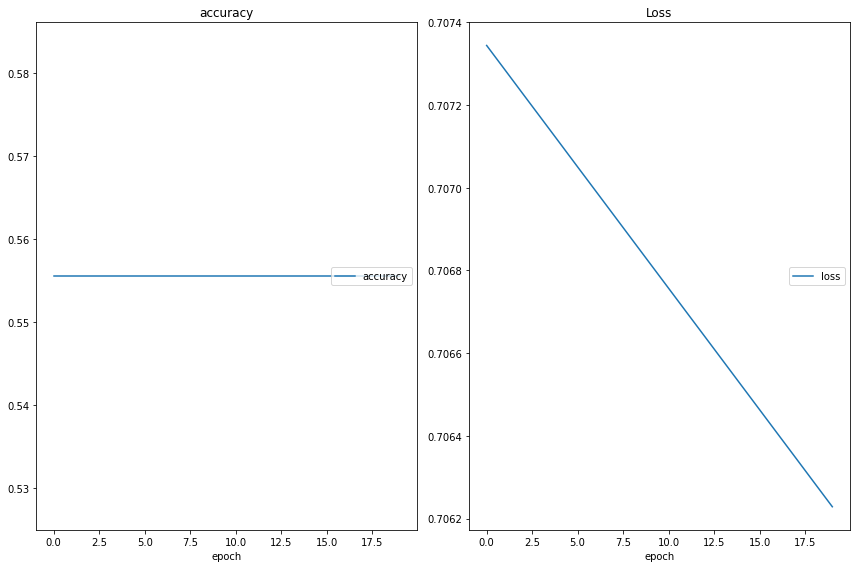

accuracy
	accuracy         	 (min:    0.556, max:    0.556, cur:    0.556)
Loss
	loss             	 (min:    0.706, max:    0.707, cur:    0.706)
1/1 [==============================] - 0s 218ms/step - loss: 0.7062 - accuracy: 0.5556


In [23]:
simpsons = pd.read_csv('TheSimpsonsOriginal.csv', delimiter=',')
simpsons.info()
simpsons.shape

X_simpsons = simpsons[['hair length', 'weight', 'age']]
y_simpsons = simpsons[['gender']]
y_simpsons.loc[y_simpsons['gender'] == 'F', 'gender'] = 2
y_simpsons.loc[y_simpsons['gender'] == 'M', 'gender'] = 1
y_simpsons.info()
y_simpsons['gender'] = pd.to_numeric(y_simpsons['gender'])


inputs_simpsons = Input(shape=(3,))
x_simpsons = Dense(3, activation='sigmoid')(inputs_simpsons)
# sigmoid(x) = 1 / (1 + exp(-x)).
x_simpsons = Dense(6, activation='sigmoid')(x_simpsons)
outputs_simpsons = Dense(1, activation='softmax')(x_simpsons)
model_simpsons = Model(inputs_simpsons, outputs_simpsons, name='XOR_NN')
# you can visualise the model in different ways – see next slide
model_simpsons.compile(optimizer=Adam(learning_rate=0.00001),
                       loss=keras.losses.binary_crossentropy,
                       metrics=['accuracy'])

# Step 6: Train the ANN-model
history_xor = model_simpsons.fit(
    X_simpsons, y_simpsons, epochs=20, callbacks=[PlotLossesKeras()])


In [24]:
"""
Exercise 2 – Forecast demo Revisited
We want to be able to predict the revenue of a company per quarter of the last 5 years (cf.
Chapter on Forecasting from Data & A.I. 2.1). This dataset is very small and therefore we
cannot construct a validation set or test set.
a)  Read in the dataset from the file ‘forecastdemo.csv’
b)  What kind of prediction are we trying to make here? Regression or classification?
c)  Determine which columns we can't use in this prediction.
d)  Now create an input data set x_forcast and the output data set (y_forcast).e) Create a neural network with the correct inputs and outputs. Make a plot if the ANN.
f)  Use your neural network to predict the returns associated with x_forcast. Do they
    match the actual yields? Create one plot of the original data and the predicted data
"""

"\nExercise 2 – Forecast demo Revisited\nWe want to be able to predict the revenue of a company per quarter of the last 5 years (cf.\nChapter on Forecasting from Data & A.I. 2.1). This dataset is very small and therefore we\ncannot construct a validation set or test set.\na)  Read in the dataset from the file ‘forecastdemo.csv’\nb)  What kind of prediction are we trying to make here? Regression or classification?\nc)  Determine which columns we can't use in this prediction.\nd)  Now create an input data set x_forcast and the output data set (y_forcast).e) Create a neural network with the correct inputs and outputs. Make a plot if the ANN.\nf)  Use your neural network to predict the returns associated with x_forcast. Do they\n    match the actual yields? Create one plot of the original data and the predicted data\n"

In [25]:
"""
Exercise 3 – Iris
a.  Read in the dataset from the file ‘iris.csv’
b.  What kind of prediction are we trying to make here? Regression or classification?
c.  Determine which columns we can't use in this prediction.
d.  Now create an input data set x_iris and normalize it. Try out one of the
    normalization techniques that you haven't used yet in an exercise or assignment.
e.  Create a trainable data set and a test data set (x_train_iris and x_test_iris) that
    consist of 80% and 20% (randomly chosen) of the input data set x_iris_norm
    respectively.
f.  Create a neural network with the correct inputs and outputs.
g.  Evaluate your neural network on your test data set (x_test_iris). What accuracy do
    you achieve?
"""

"\nExercise 3 – Iris\na.  Read in the dataset from the file ‘iris.csv’\nb.  What kind of prediction are we trying to make here? Regression or classification?\nc.  Determine which columns we can't use in this prediction.\nd.  Now create an input data set x_iris and normalize it. Try out one of the\n    normalization techniques that you haven't used yet in an exercise or assignment.\ne.  Create a trainable data set and a test data set (x_train_iris and x_test_iris) that\n    consist of 80% and 20% (randomly chosen) of the input data set x_iris_norm\n    respectively.\nf.  Create a neural network with the correct inputs and outputs.\ng.  Evaluate your neural network on your test data set (x_test_iris). What accuracy do\n    you achieve?\n"